In [6]:
from analysis import get_track_durations_stdev_distribution
from analysis import get_artist_diversity_distribution
from pre_processing import read_pre_processed_data
import matplotlib.pyplot as plt
import numpy as np

In [4]:
_, tracks_df, playlists_tracks_df = read_pre_processed_data('../data')

In [5]:
duration_s_stdevs = get_track_durations_stdev_distribution(tracks_df, playlists_tracks_df)

100%|██████████| 1000000/1000000 [01:58<00:00, 8420.20it/s]


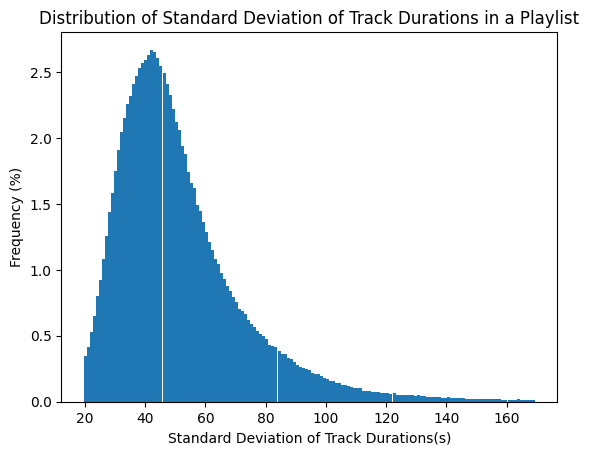

In [7]:
bins = np.linspace(np.percentile(duration_s_stdevs, 1), np.percentile(duration_s_stdevs, 99),
                   int(np.percentile(duration_s_stdevs, 99) - np.percentile(duration_s_stdevs, 1))+1)

# Count the number of elements in each bin
counts, _ = np.histogram(duration_s_stdevs, bins=bins)
counts = counts / np.sum(counts) * 100

# Plot the bar graph
plt.bar(bins[:-1], counts, width=1)  # Adjust width as needed
plt.xlabel("Standard Deviation of Track Durations(s)")
plt.ylabel("Frequency (%)")
plt.title("Distribution of Standard Deviation of Track Durations in a Playlist")
plt.show()

In [8]:
artist_diversity = get_artist_diversity_distribution(tracks_df, playlists_tracks_df)

100%|██████████| 1000000/1000000 [02:29<00:00, 6687.52it/s]


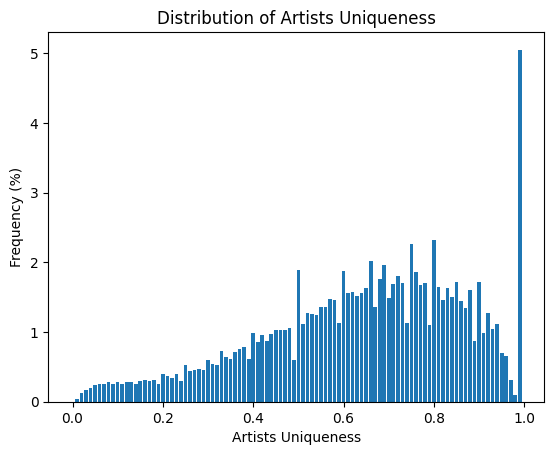

In [9]:
bins = np.linspace(0.0, 1.0, 101)

# Count the number of elements in each bin
counts, _ = np.histogram(artist_diversity, bins=bins)
counts = counts / np.sum(counts) * 100

# Plot the bar graph
plt.bar(bins[:-1], counts, width=0.008)  # Adjust width as needed
plt.xlabel("Artists Uniqueness")
plt.ylabel("Frequency (%)")
plt.title("Distribution of Artists Uniqueness")
plt.show()